# Clasificaciones de imagenes con EfficientNetB0

##BUILD ROBOCUP_2019 Dataset

RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for Validate


##Importar los paquetes

In [1]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt

##Importar los paquetes

##EfficientNetB0 for subclass

###Load Data

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 64
IMG_SIZE = 224
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - EfficientNetB0

In [ ]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation="relu")(x)
outputs = keras.layers.Dense(180, activation='softmax' name='pred')(x)

model = keras.Model(inputs, outputs)
model.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
Total params: 4,797,783
Trainable params: 748,212
Non-trainabl

### Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, verbose=2)

Epoch 1/20
2454/2454 - 641s - loss: 5.2190 - accuracy: 0.0045 - top_5_accuracy: 0.0170 - precision: 0.0000e+00 - val_loss: 5.1947 - val_accuracy: 0.0065 - val_top_5_accuracy: 0.0311 - val_precision: 0.0000e+00 - 641s/epoch - 261ms/step
Epoch 2/20
2454/2454 - 596s - loss: 5.1992 - accuracy: 0.0037 - top_5_accuracy: 0.0201 - precision: 0.0000e+00 - val_loss: 5.1911 - val_accuracy: 0.0065 - val_top_5_accuracy: 0.0319 - val_precision: 0.0000e+00 - 596s/epoch - 243ms/step
Epoch 3/20
2454/2454 - 592s - loss: 5.1964 - accuracy: 0.0039 - top_5_accuracy: 0.0199 - precision: 0.0000e+00 - val_loss: 5.1888 - val_accuracy: 0.0065 - val_top_5_accuracy: 0.0322 - val_precision: 0.0000e+00 - 592s/epoch - 241ms/step
Epoch 4/20
2454/2454 - 593s - loss: 5.1944 - accuracy: 0.0046 - top_5_accuracy: 0.0268 - precision: 0.0000e+00 - val_loss: 5.1872 - val_accuracy: 0.0065 - val_top_5_accuracy: 0.0325 - val_precision: 0.0000e+00 - 593s/epoch - 241ms/step
Epoch 5/20
2454/2454 - 592s - loss: 5.1931 - accuracy: 0

###print results

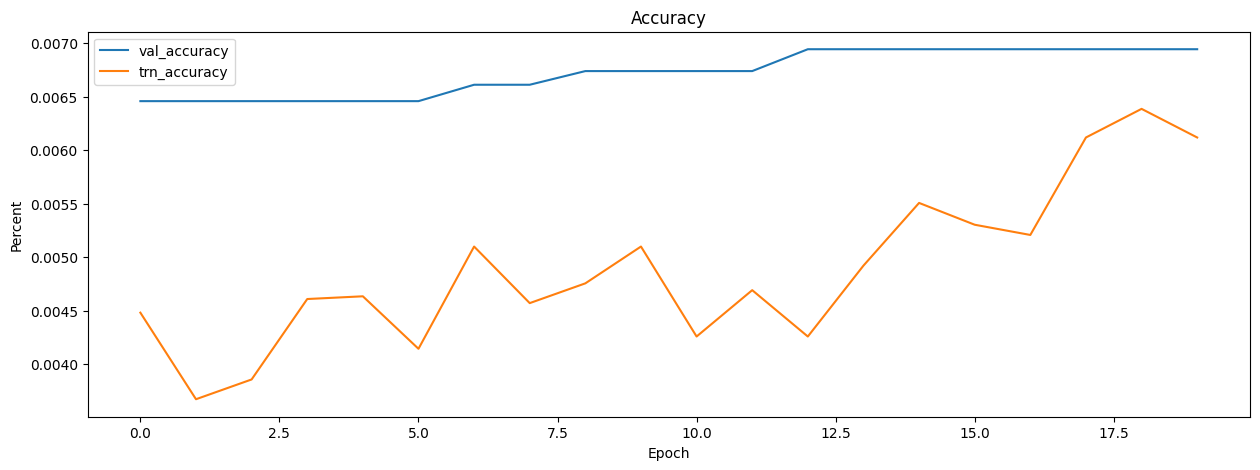

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

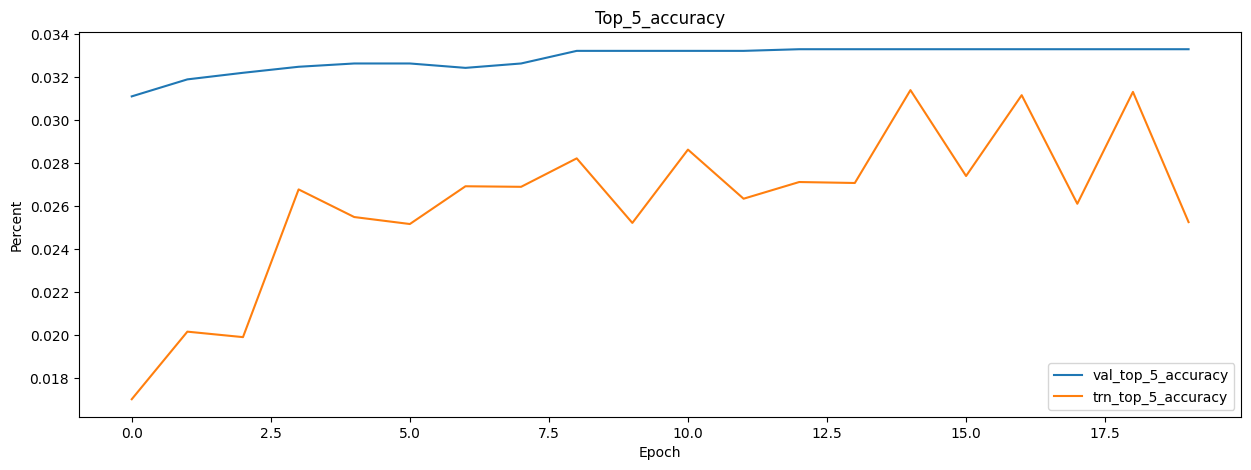

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

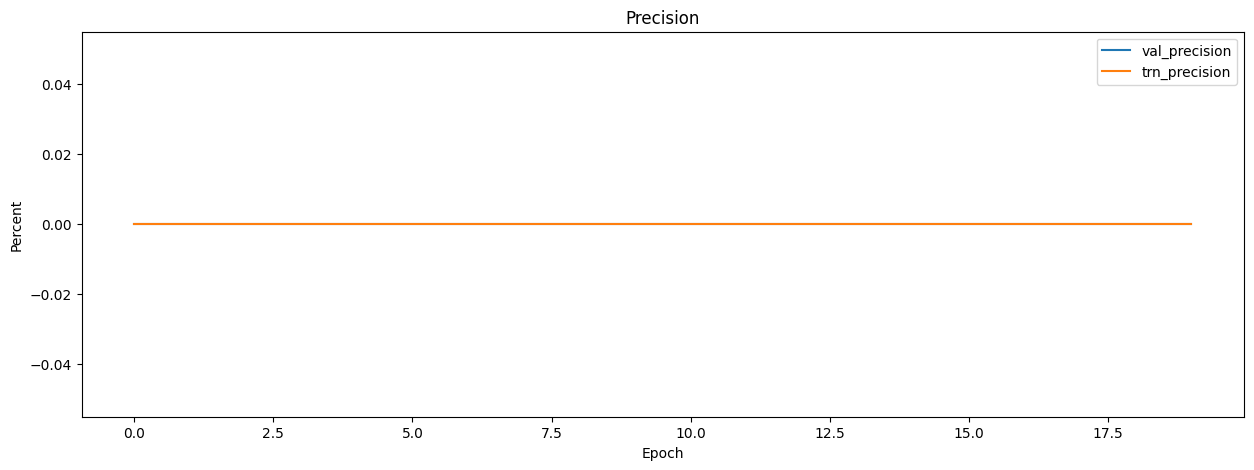

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###Save Model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/efficientNetB0')

TypeError: ignored

## Resnet50V2 for Superclass

###Load super class data

In [2]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


### Create the model
 whose weights are generated in the previous step, when training with the fine classes.

In [3]:
BATCH_SIZE = 64
IMG_SIZE = 224
NUM_CLASSES = 8

In [4]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [5]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/efficientNetB0Model')
# Agregar una nueva capa de salida personalizada
new_output_layer = keras.layers.Dense(NUM_CLASSES, activation='softmax', name='superClass')(model.layers[-1].output)

# Crear un nuevo modelo con la capa de salida personalizada
model = keras.models.Model(inputs=model.input, outputs=new_output_layer)
model.summary()

ValueError: ignored

### Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches)


###print results

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/efficientNetB0_superClass')

In [ ]:
from google.colab import runtime 
runtime.unassign